## Importation des packages et importer les données

In [1]:
# IMPORTATION DES PACKAGES

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.decomposition as PCA
import sklearn.preprocessing as StandardScaler
import scipy.stats as stats

In [2]:
# IMPORTATION DU DATAFRAME ET AFFICHER LES 5 PREMIÈRES LIGNES

df = pd.read_excel('USDA_National_Nutrient_DataBase.xlsx')
df.head()

NDB_No               Shrt_Desc  Water_(g)  Energ_Kcal  Protein_(g)  \
0    1001        BUTTER,WITH SALT      15.87         717         0.85   
1    1002  BUTTER,WHIPPED,W/ SALT      16.72         718         0.49   
2    1003    BUTTER OIL,ANHYDROUS       0.24         876         0.28   
3    1004             CHEESE,BLUE      42.41         353        21.40   
4    1005            CHEESE,BRICK      41.11         371        23.24   

   Lipid_Tot_(g)  Ash_(g)  Carbohydrt_(g)  Fiber_TD_(g)  Sugar_Tot_(g)  ...  \
0          81.11     2.11            0.06           0.0           0.06  ...   
1          78.30     1.62            2.87           0.0           0.06  ...   
2          99.48     0.00            0.00           0.0           0.00  ...   
3          28.74     5.11            2.34           0.0           0.50  ...   
4          29.68     3.18            2.79           0.0           0.51  ...   

   Vit_K_(µg)  FA_Sat_(g)  FA_Mono_(g)  FA_Poly_(g)  Cholestrl_(mg)  GmWt_1  \
0         7.0      51.368       21.021        3.043           215.0    5.00   
1         4.6      45.390       19.874        3.331           225.0    3.80   
2         8.6      61.924       28.732        3.694           256.0   12.80   
3         2.4      18.669        7.778        0.800            75.0   28.35   
4         2.5      18.764        8.598        0.784            94.0  132.00   

                   GmWt_Desc1  GmWt_2       GmWt_Desc2  Refuse_Pct  
0  1 pat,  (1" sq, 1/3" high)    14.2           1 tbsp         0.0  
1  1 pat,  (1" sq, 1/3" high)     9.4           1 tbsp         0.0  
2                      1 tbsp   205.0            1 cup         0.0  
3                        1 oz    17.0     1 cubic inch         0.0  
4                1 cup, diced   113.0  1 cup, shredded         0.0  

[5 rows x 53 columns]

In [3]:
# CHANGEMENT D'INDEX

df=df.set_index('NDB_No')

In [4]:
# ANALYSE DE LA DIMENSION DU DATAFRAME

df.shape

(8790, 52)

In [5]:
# RÉDUCTION DU NOMBRE DE VARIABLES
keep_vars=['Shrt_Desc','Energ_Kcal','Protein_(g)','Lipid_Tot_(g)','Carbohydrt_(g)','Fiber_TD_(g)','Calcium_(mg)','Iron_(mg)','Sodium_(mg)','Water_(g)','Magnesium_(mg)','Phosphorus_(mg)','Vit_C_(mg)','FA_Sat_(g)','FA_Mono_(g)','FA_Poly_(g)']

df_restrict = df[keep_vars]

In [6]:
# ANALYSE DU TYPES DE VARIABLES

df_restrict.dtypes

Shrt_Desc           object
Energ_Kcal           int64
Protein_(g)        float64
Lipid_Tot_(g)      float64
Carbohydrt_(g)     float64
Fiber_TD_(g)       float64
Calcium_(mg)       float64
Iron_(mg)          float64
Sodium_(mg)        float64
Water_(g)          float64
Magnesium_(mg)     float64
Phosphorus_(mg)    float64
Vit_C_(mg)         float64
FA_Sat_(g)         float64
FA_Mono_(g)        float64
FA_Poly_(g)        float64
dtype: object

## TRAITEMENT DES DONNÉES MANQUANTES

In [7]:
# ANALYSE DE DONNÉES MANQUANTES

missing_values = df_restrict.isnull().sum()
missing_proportions = missing_values / len(df_restrict)

missing_df = pd.concat([missing_values, missing_proportions], axis=1)
missing_df.columns = ['Nombre de valeurs manquantes', 'Proportion de valeurs manquantes']

missing_df = missing_df.sort_values('Proportion de valeurs manquantes', ascending=False)

missing_df

Nombre de valeurs manquantes  \
Vit_C_(mg)                                818   
Magnesium_(mg)                            739   
FA_Mono_(g)                               666   
FA_Poly_(g)                               665   
Fiber_TD_(g)                              594   
Phosphorus_(mg)                           579   
FA_Sat_(g)                                349   
Calcium_(mg)                              348   
Iron_(mg)                                 144   
Sodium_(mg)                                83   
Water_(g)                                   1   
Shrt_Desc                                   0   
Energ_Kcal                                  0   
Protein_(g)                                 0   
Lipid_Tot_(g)                               0   
Carbohydrt_(g)                              0   

                 Proportion de valeurs manquantes  
Vit_C_(mg)                               0.093060  
Magnesium_(mg)                           0.084073  
FA_Mono_(g)                              0.075768  
FA_Poly_(g)                              0.075654  
Fiber_TD_(g)                             0.067577  
Phosphorus_(mg)                          0.065870  
FA_Sat_(g)                               0.039704  
Calcium_(mg)                             0.039590  
Iron_(mg)                                0.016382  
Sodium_(mg)                              0.009443  
Water_(g)                                0.000114  
Shrt_Desc                                0.000000  
Energ_Kcal                               0.000000  
Protein_(g)                              0.000000  
Lipid_Tot_(g)                            0.000000  
Carbohydrt_(g)                           0.000000

<Axes: >

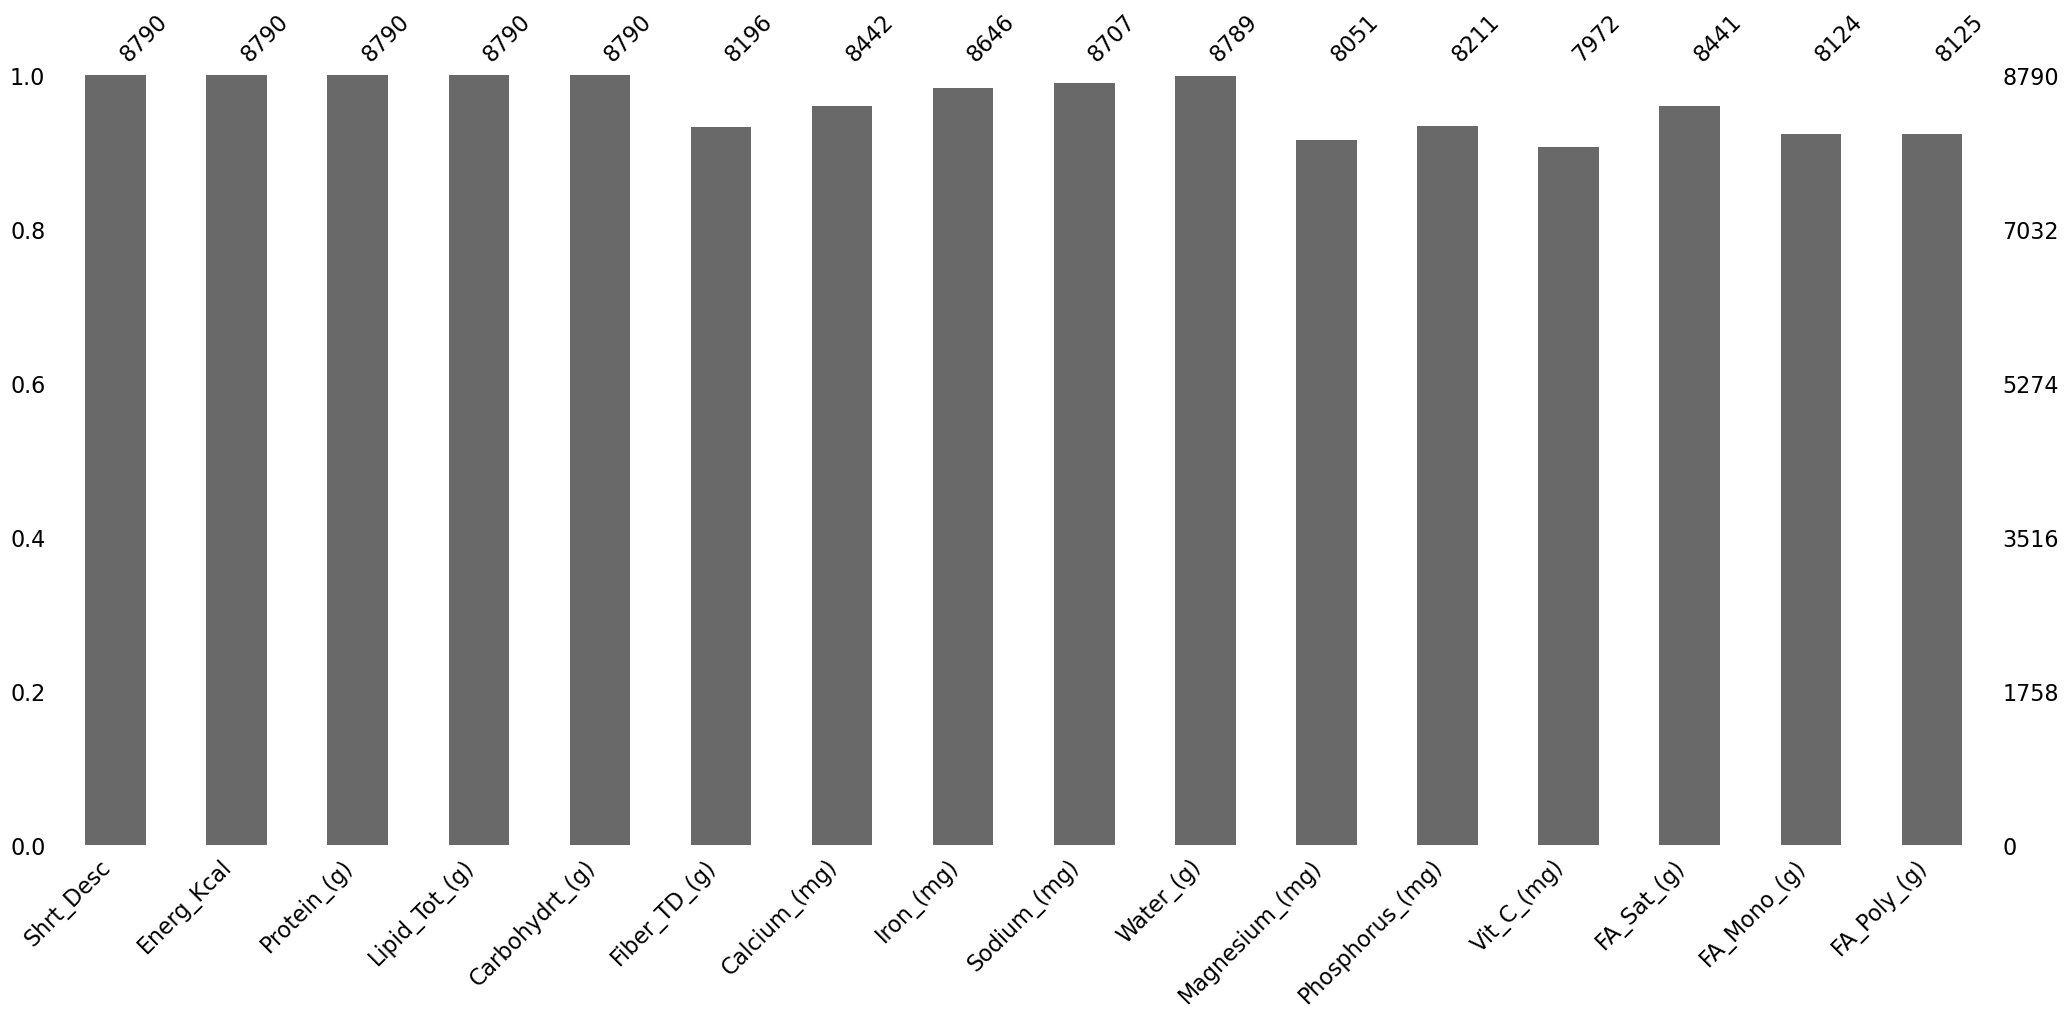

In [8]:
# VISUALISATION DES DONNÉES MANQUANTES
import missingno as msno
# Affichage des valeurs manquantes sous forme de barre
msno.bar(df_restrict)

<Axes: >

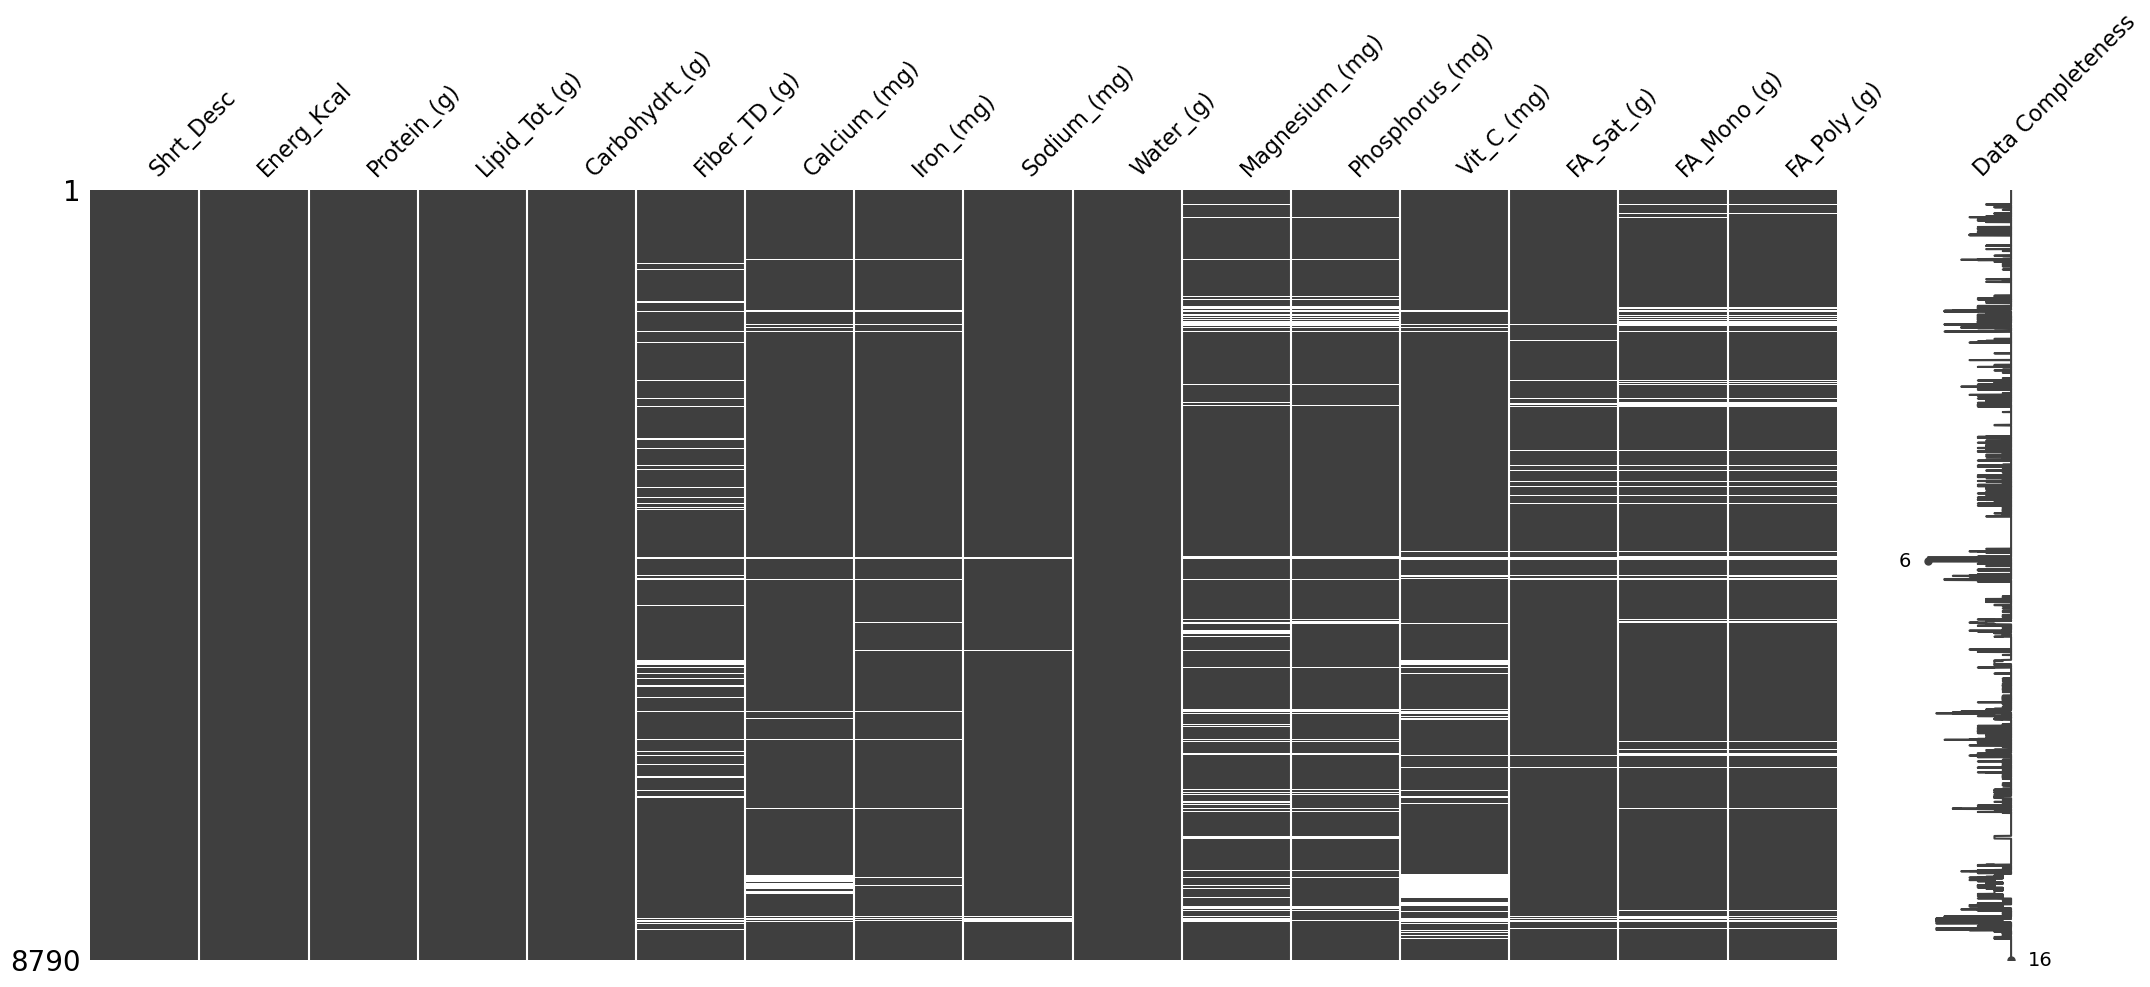

In [9]:
# Affichage des valeurs manquantes sous forme de martrice
msno.matrix(df_restrict,labels=True)

In [10]:
# TRAITEMENT DES VALEURS MANQUANTES : ON REMPLACE LES VALEURS MANQUANTES PAR ZERO CAR UN ALIMENT NE CONTIENT PAS TOUS LES NUTRIMENTS
df_miss = df_restrict.fillna(0)

# Vérification du remplacement des valeurs manquantes par zero
df_miss.isnull().sum()

Shrt_Desc          0
Energ_Kcal         0
Protein_(g)        0
Lipid_Tot_(g)      0
Carbohydrt_(g)     0
Fiber_TD_(g)       0
Calcium_(mg)       0
Iron_(mg)          0
Sodium_(mg)        0
Water_(g)          0
Magnesium_(mg)     0
Phosphorus_(mg)    0
Vit_C_(mg)         0
FA_Sat_(g)         0
FA_Mono_(g)        0
FA_Poly_(g)        0
dtype: int64

## ANALYSE DESCRIPTIVE UNIVARIÉ

In [11]:
# DESCRITION DES VARIABLES QUANTITAVES

description =  df_miss.describe()
print(description)

        Energ_Kcal  Protein_(g)  Lipid_Tot_(g)  Carbohydrt_(g)  Fiber_TD_(g)  \
count  8790.000000  8790.000000    8790.000000     8790.000000   8790.000000   
mean    226.317634    11.342849      10.553725       22.127710      2.039625   
std     169.877539    10.530474      15.814842       27.270822      4.267904   
min       0.000000     0.000000       0.000000        0.000000      0.000000   
25%      91.000000     2.380000       0.950000        0.050000      0.000000   
50%     191.000000     8.000000       5.140000        9.340000      0.400000   
75%     337.000000    19.880000      13.720000       34.910000      2.400000   
max     902.000000    88.320000     100.000000      100.000000     79.000000   

       Calcium_(mg)    Iron_(mg)   Sodium_(mg)    Water_(g)  Magnesium_(mg)  \
count   8790.000000  8790.000000   8790.000000  8790.000000     8790.000000   
mean      73.700114     2.655447    309.545165    54.106061       32.328555   
std      200.017998     5.651177    939.45

In [12]:
# DESCRITION DES VARIABLES QUALITATIVES

df_miss.describe(include='object')

Shrt_Desc
count                                                8790
unique                                               8787
top     BEEF,CHUCK,UNDER BLADE CNTR STEAK,BNLESS,DENVE...
freq                                                    2

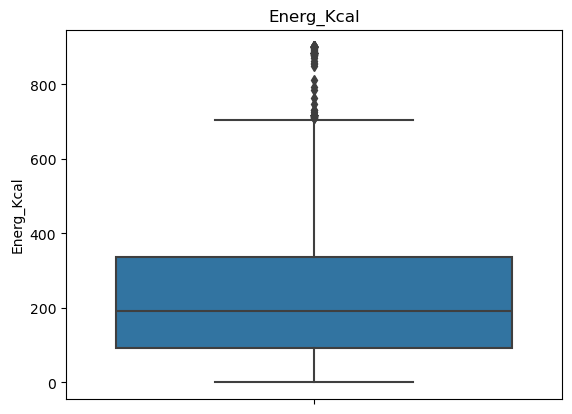

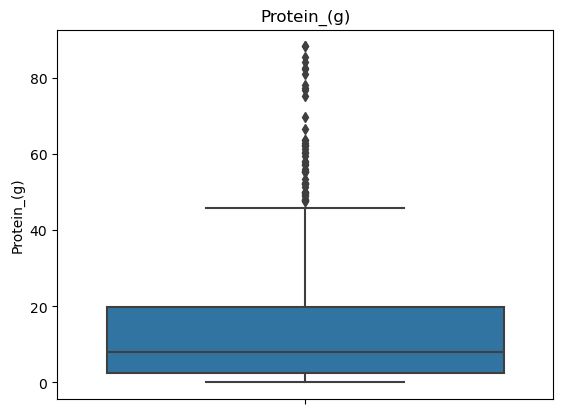

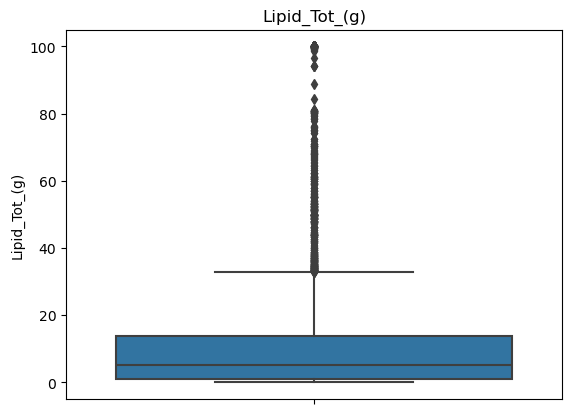

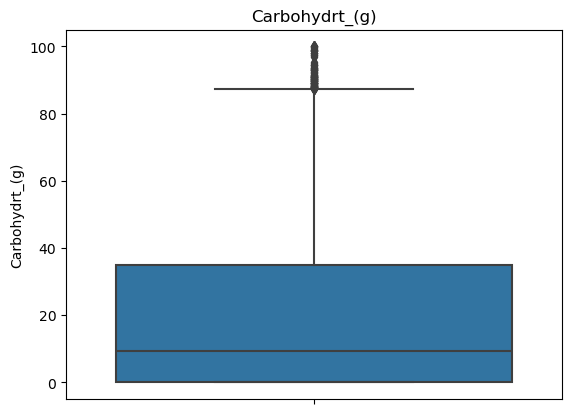

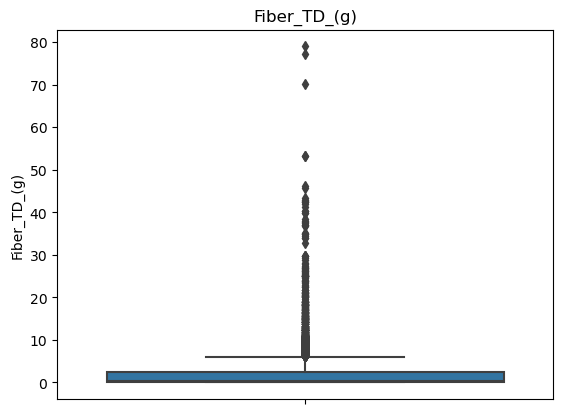

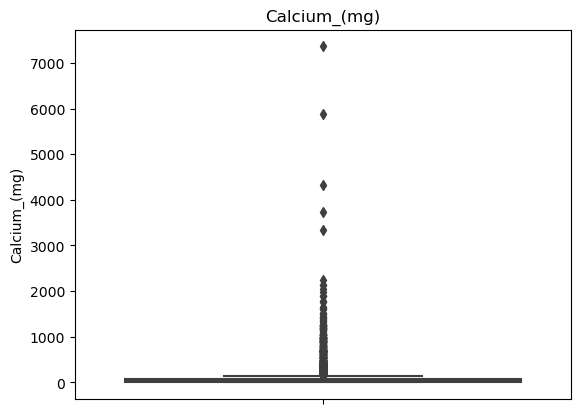

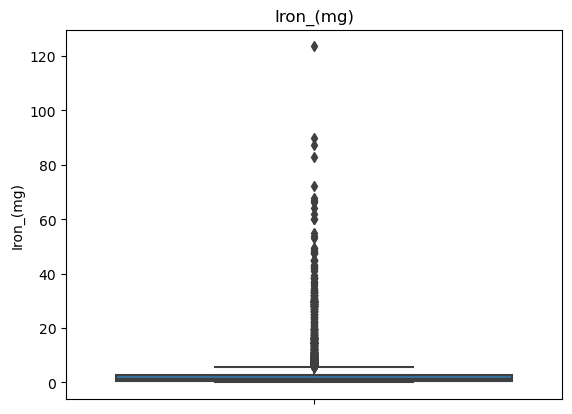

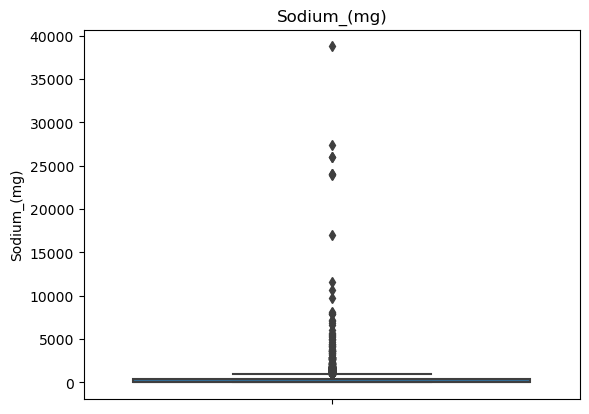

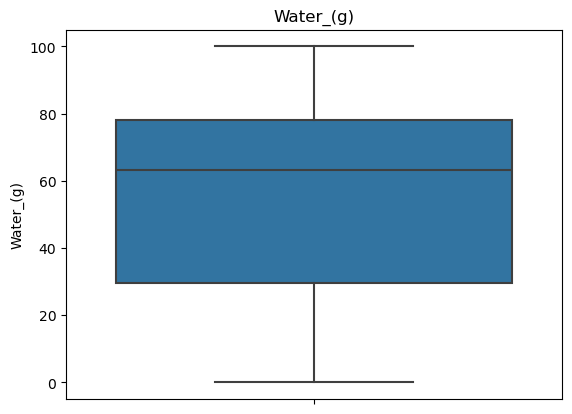

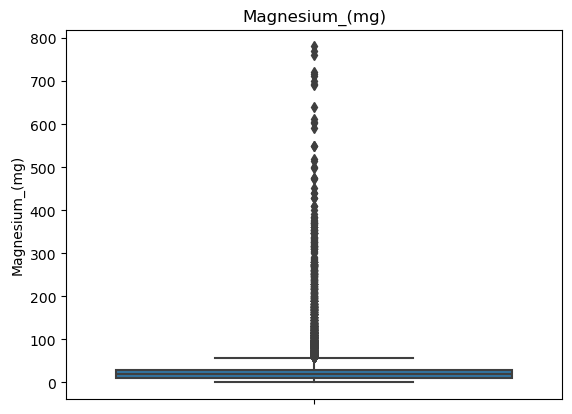

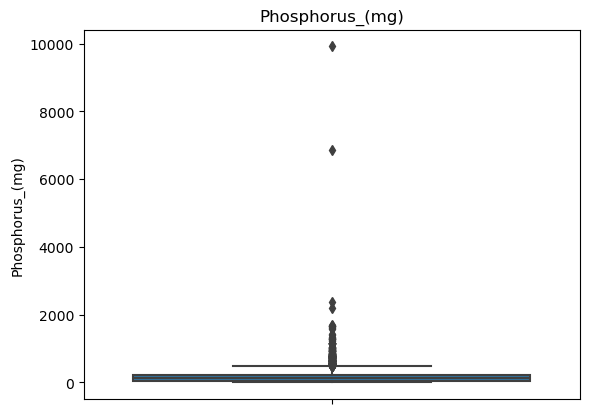

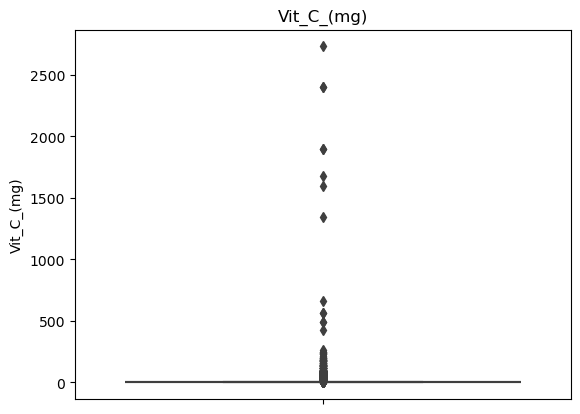

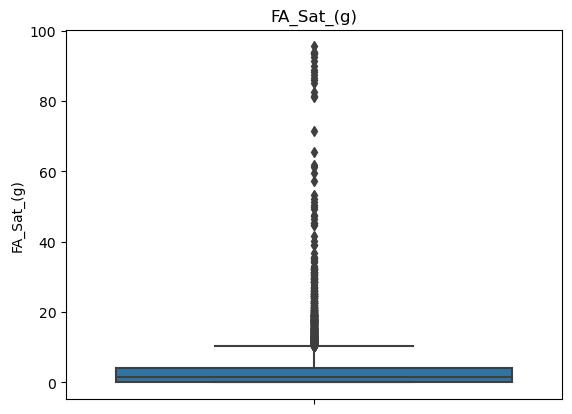

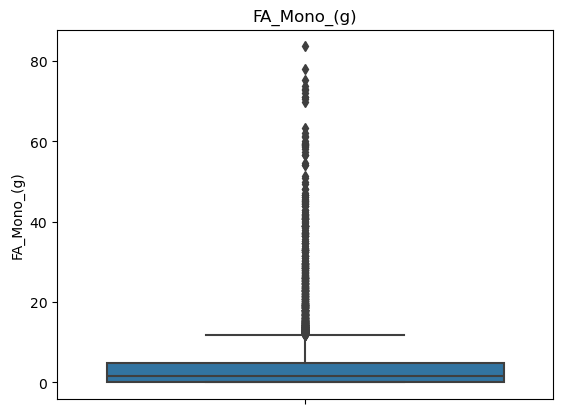

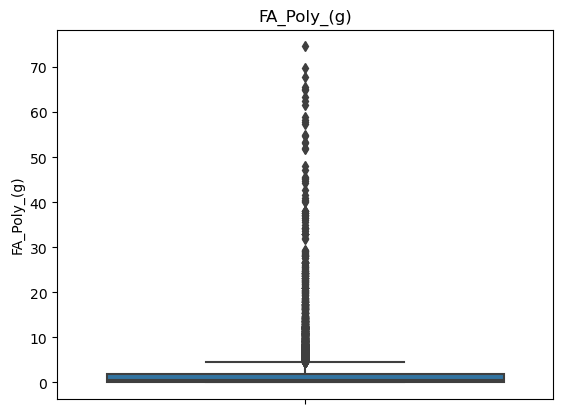

In [13]:
# ANALYSE DESCRIPTIVE DES VARIABLES QUANTITATIVES

# Sélection des variables quantitatives
df_quantitatives = df_miss.select_dtypes(include=['float64', 'int64'])

# Tracé des boxplots pour chaque variable quantitative avec Seaborn
for var in df_quantitatives:
    plt.title(f"{var}")
    sns.boxplot(y=var, data=df_quantitatives)
    plt.show()

    

/Applications/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


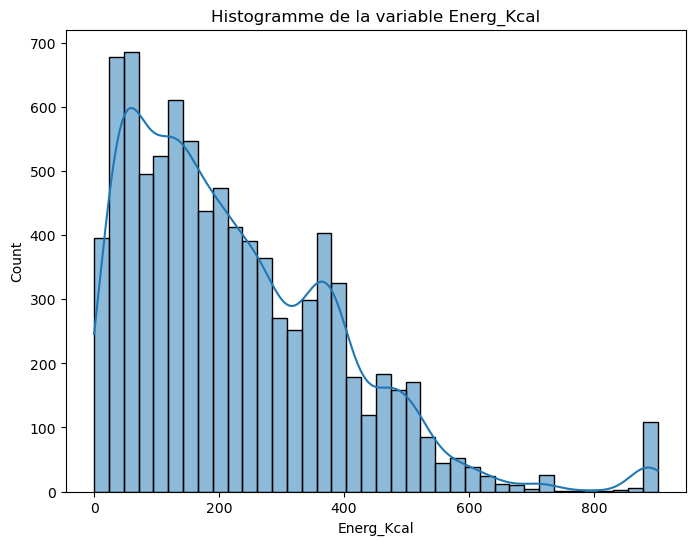

/Applications/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


La variable Energ_Kcal ne suit pas une loi normale (p-value=0.0)


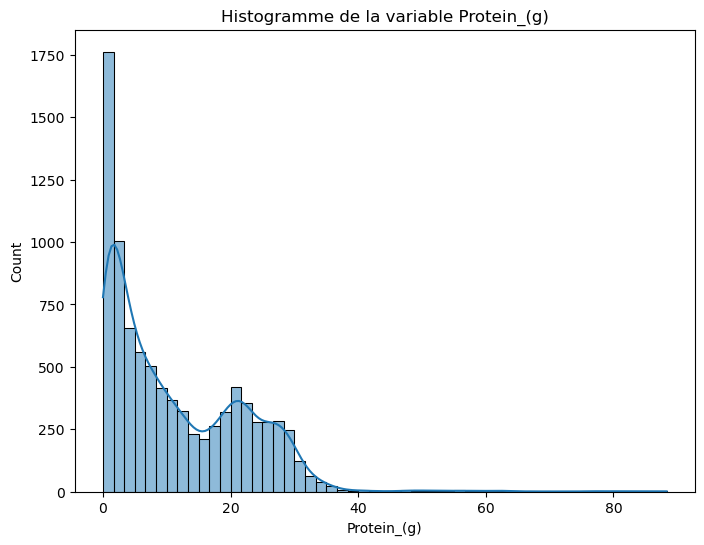

La variable Protein_(g) ne suit pas une loi normale (p-value=0.0)


/Applications/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


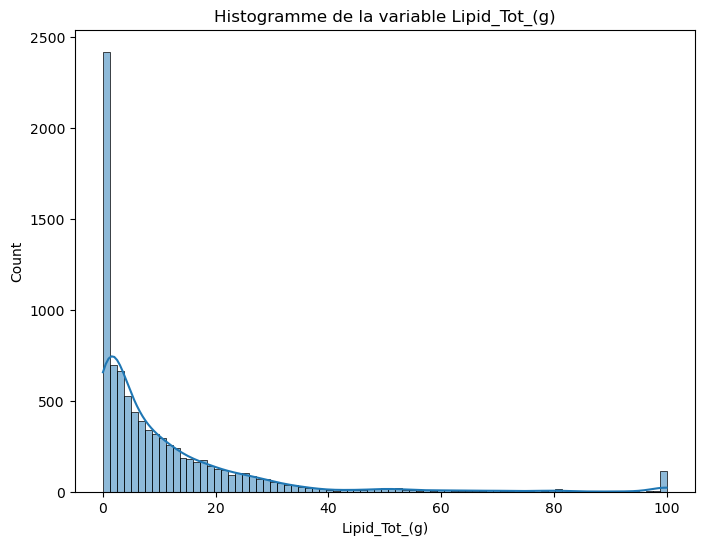

La variable Lipid_Tot_(g) ne suit pas une loi normale (p-value=0.0)


/Applications/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


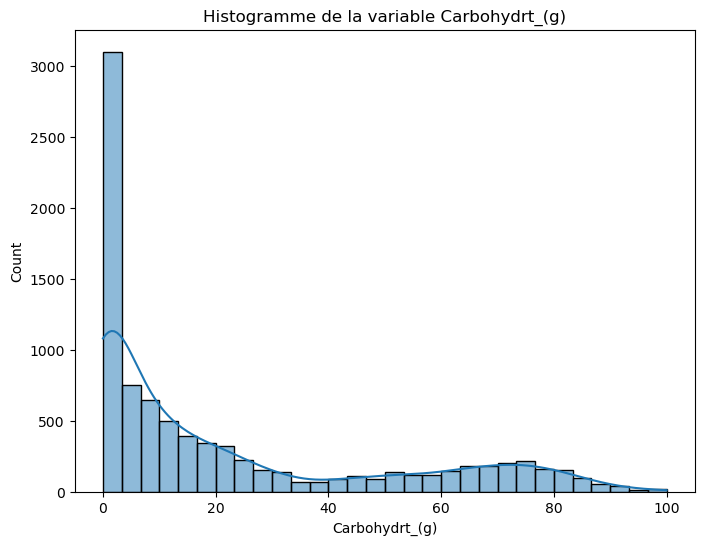

La variable Carbohydrt_(g) ne suit pas une loi normale (p-value=1.2447671411168773e-272)


/Applications/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


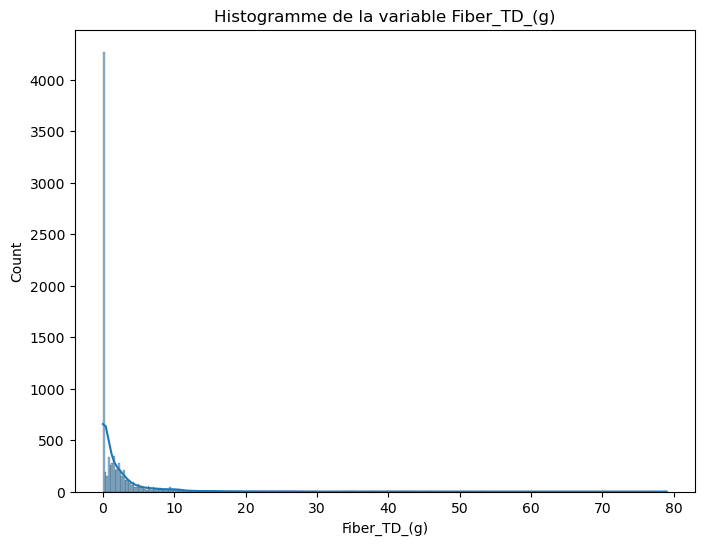

La variable Fiber_TD_(g) ne suit pas une loi normale (p-value=0.0)


/Applications/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


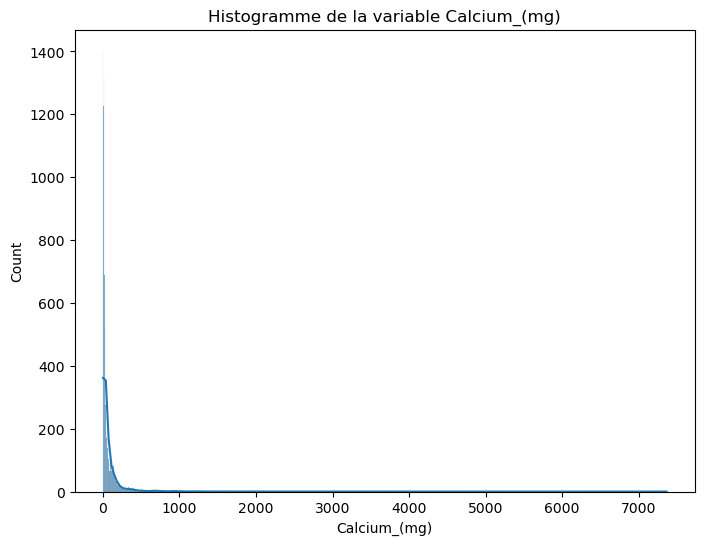

La variable Calcium_(mg) ne suit pas une loi normale (p-value=0.0)


/Applications/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


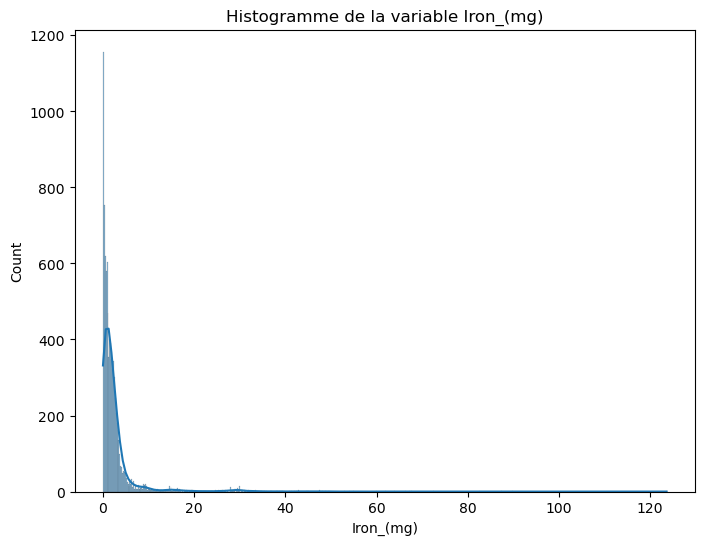

La variable Iron_(mg) ne suit pas une loi normale (p-value=0.0)


/Applications/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


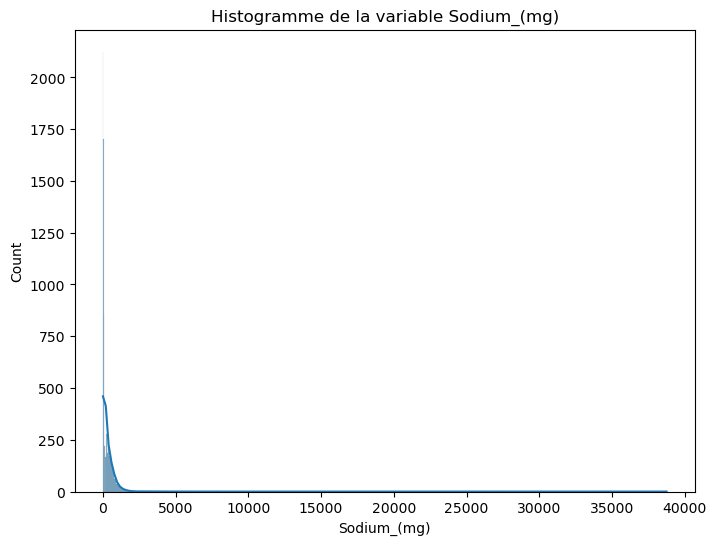

La variable Sodium_(mg) ne suit pas une loi normale (p-value=0.0)


/Applications/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


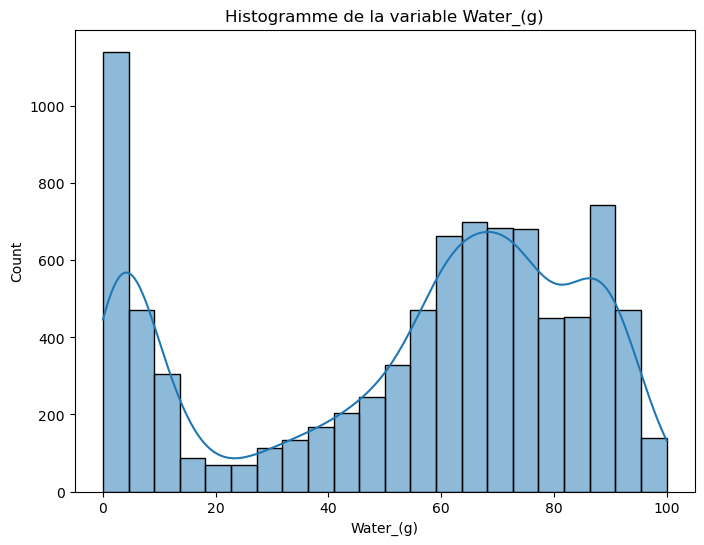

La variable Water_(g) ne suit pas une loi normale (p-value=0.0)


/Applications/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


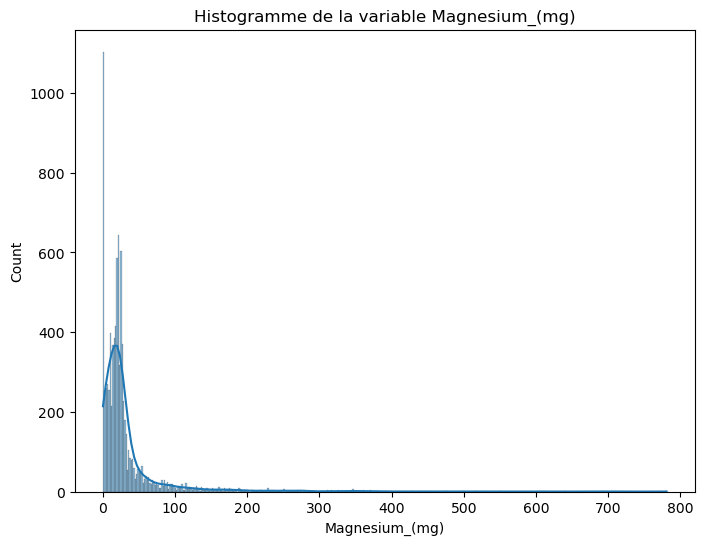

La variable Magnesium_(mg) ne suit pas une loi normale (p-value=0.0)


/Applications/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


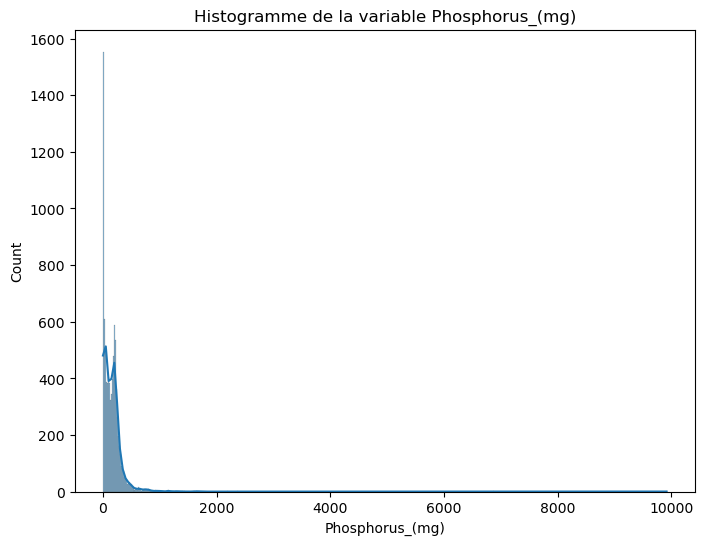

La variable Phosphorus_(mg) ne suit pas une loi normale (p-value=0.0)


/Applications/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


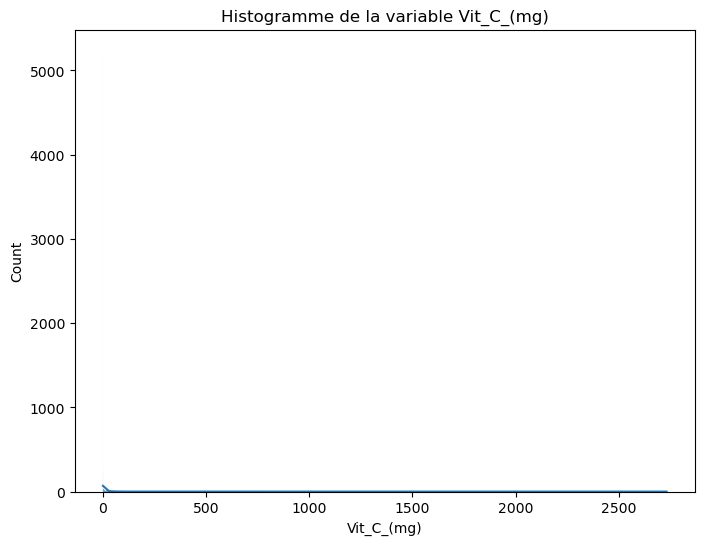

La variable Vit_C_(mg) ne suit pas une loi normale (p-value=0.0)


/Applications/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


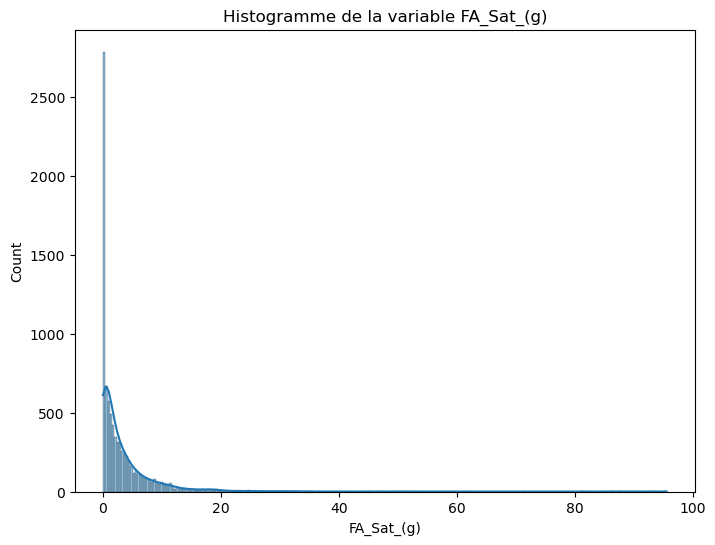

La variable FA_Sat_(g) ne suit pas une loi normale (p-value=0.0)


/Applications/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


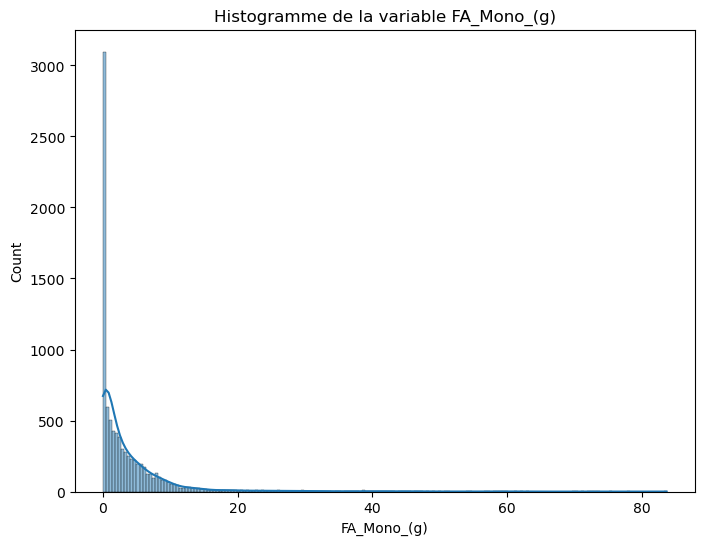

La variable FA_Mono_(g) ne suit pas une loi normale (p-value=0.0)


In [14]:
# CRÉATION D'UN HISTOGRAMME POUR CHAQUE VARIABLE

for column in df_quantitatives.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_quantitatives, x=column, kde=True)
    plt.title(f"Histogramme de la variable {column}")
    plt.show()

    statistic, p_value = stats.normaltest(df_quantitatives[column])
    if p_value < 0.05:
        print(f"La variable {column} ne suit pas une loi normale (p-value={p_value})")
    else:
        print(f"La variable {column} suit une loi normale (p-value={p_value})")

## ANALYSE BIVARIÉE

/Applications/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

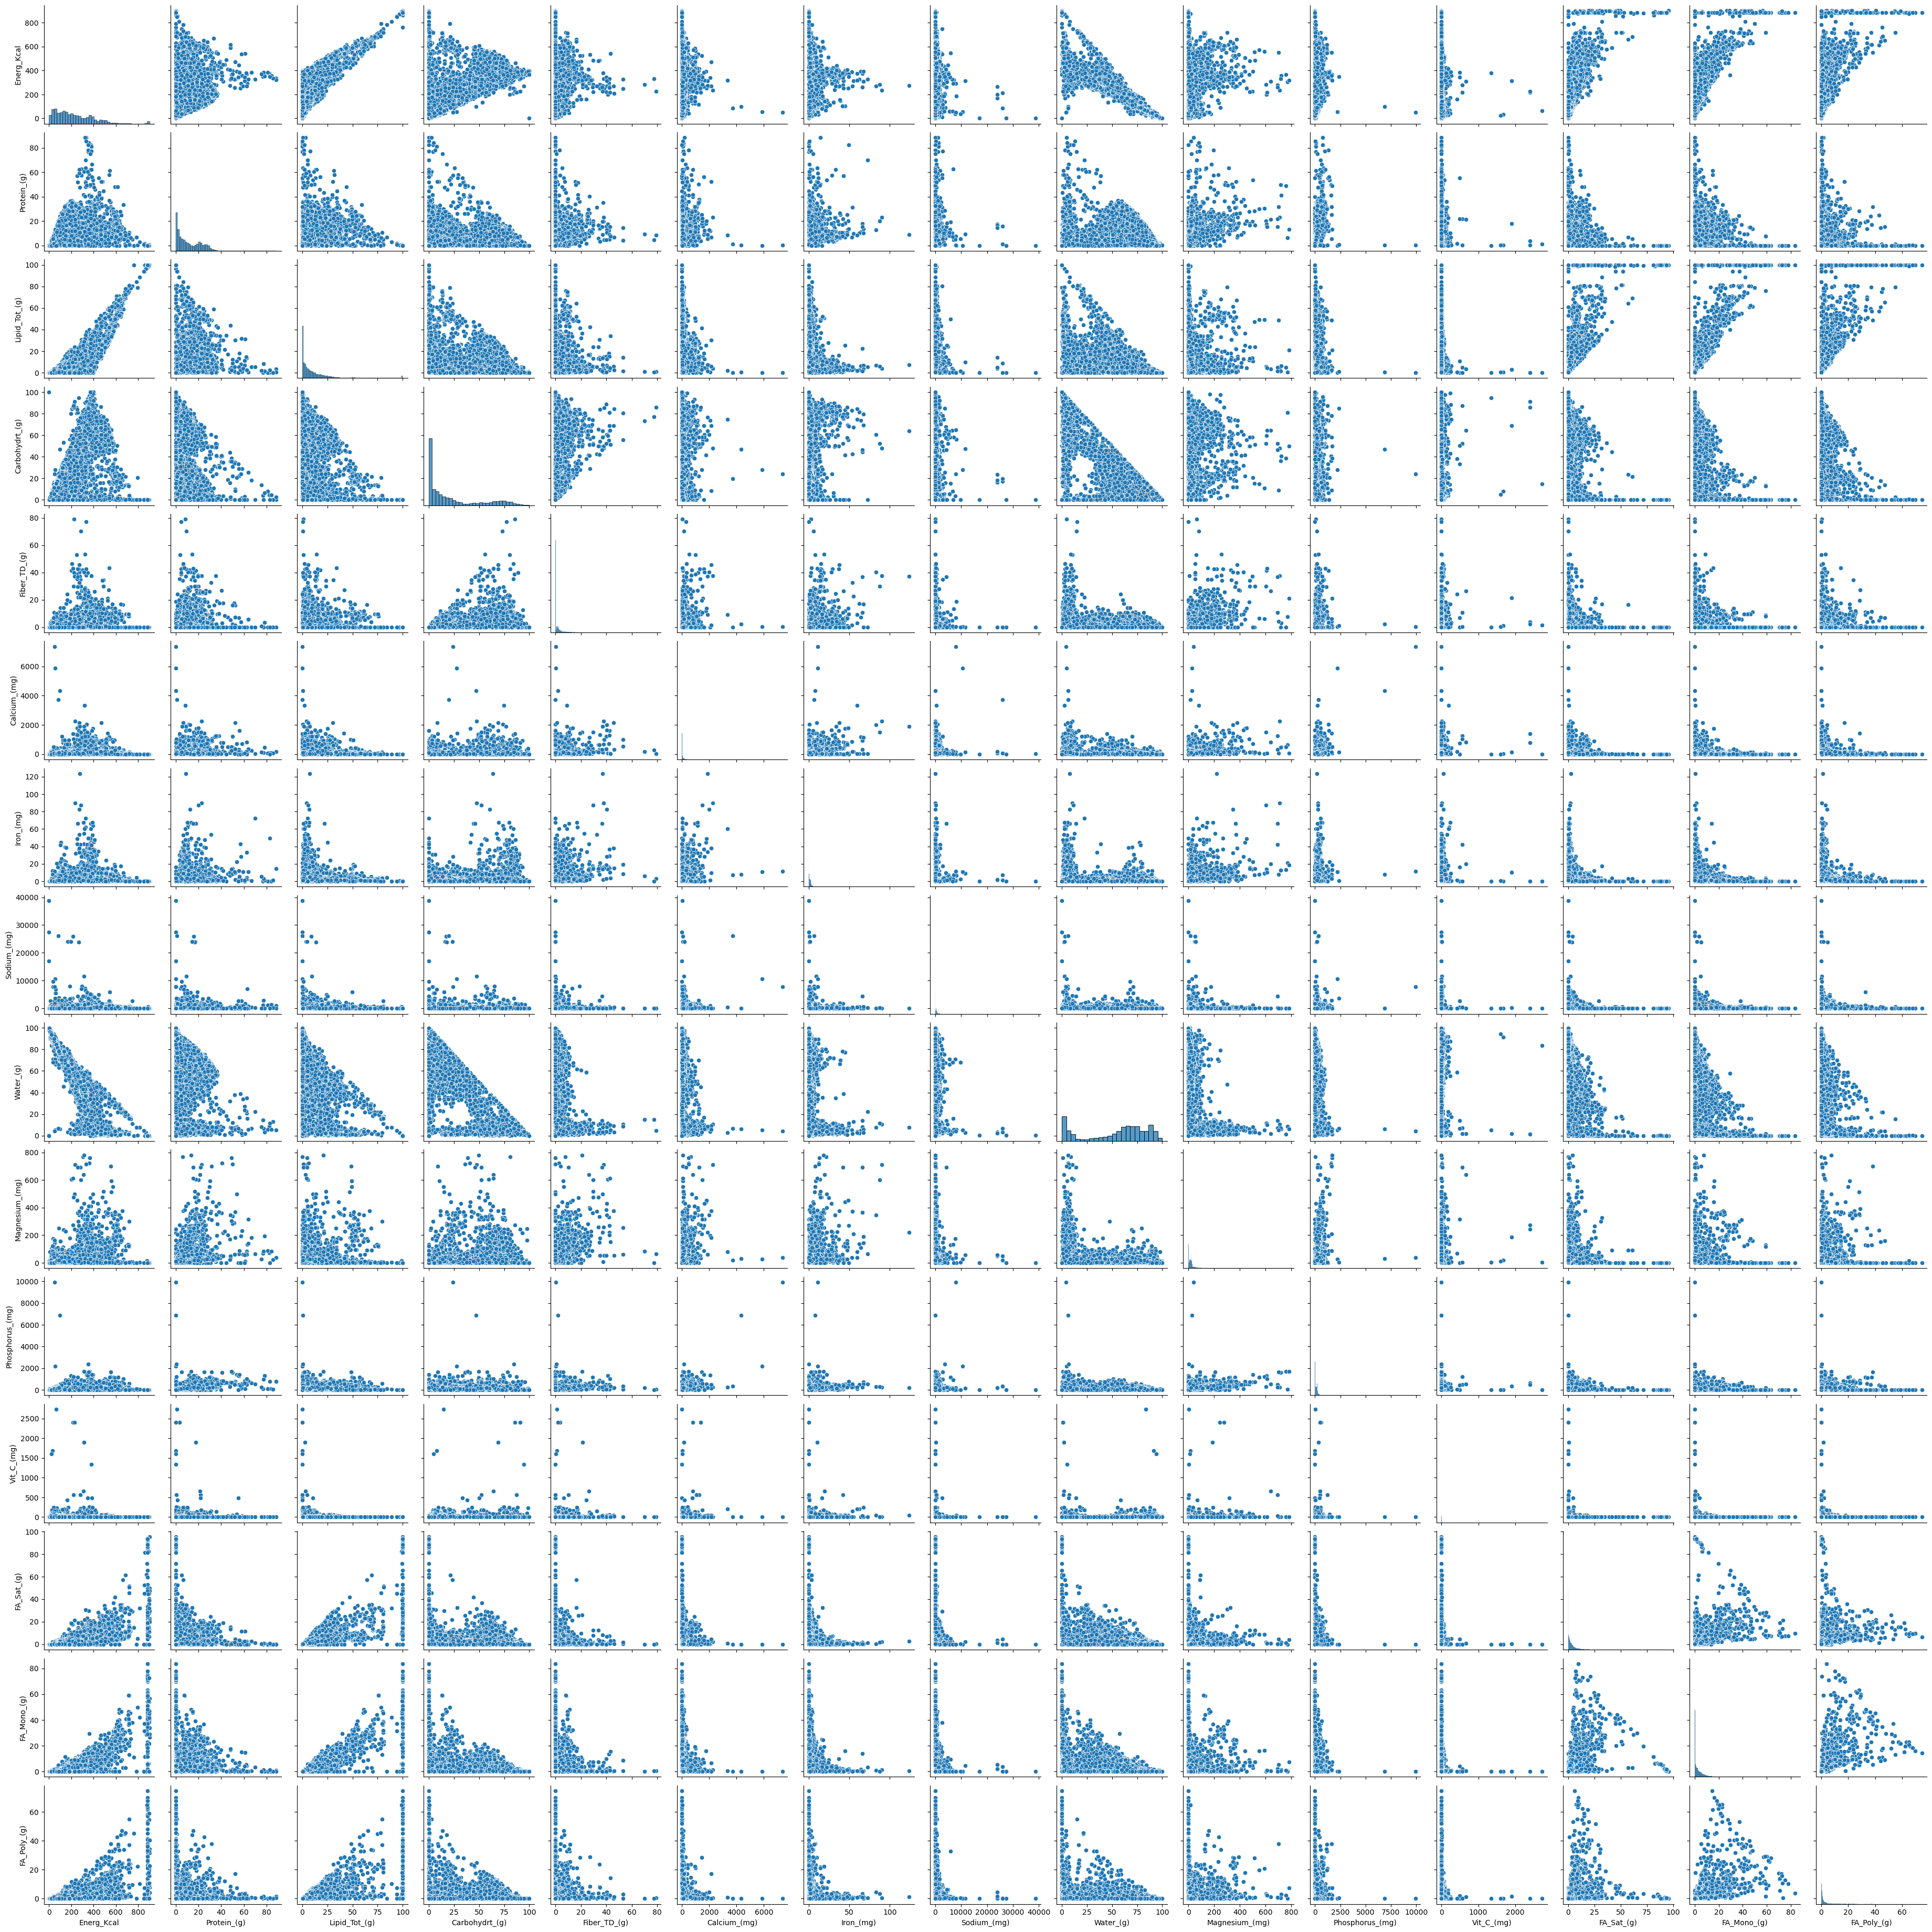

In [16]:
sns.pairplot(df_miss)

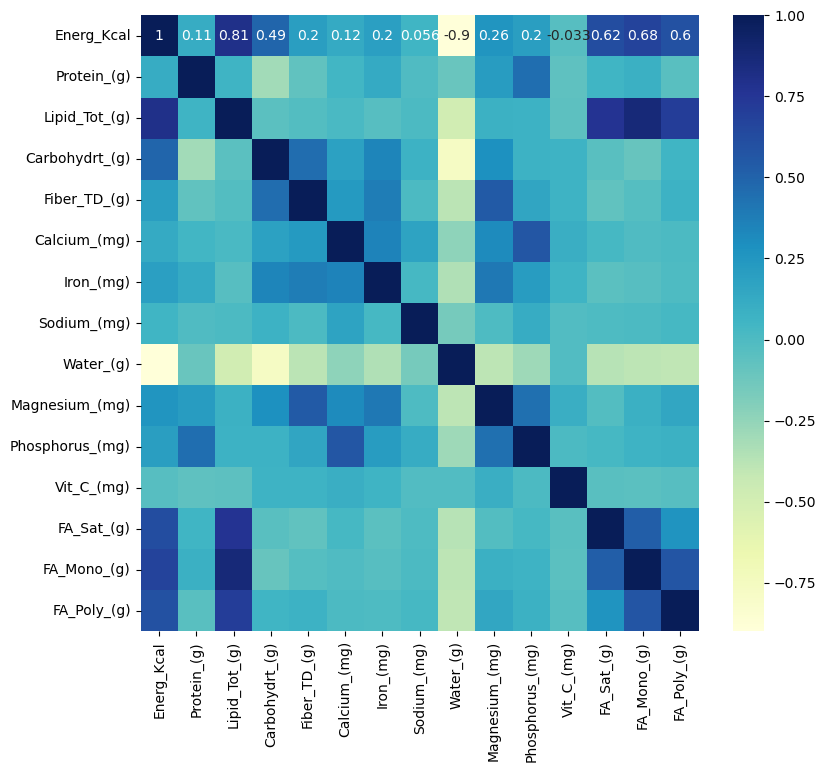

In [28]:
# Obtenir le tableau de corélation et la heatmap (corrélation de pearson)

corr_matrix = df_quantitatives.corr()

# Calcul des p-values pour chaque paire de variables
fig, ax = plt.subplots(figsize=(9,8))
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")
plt.show()

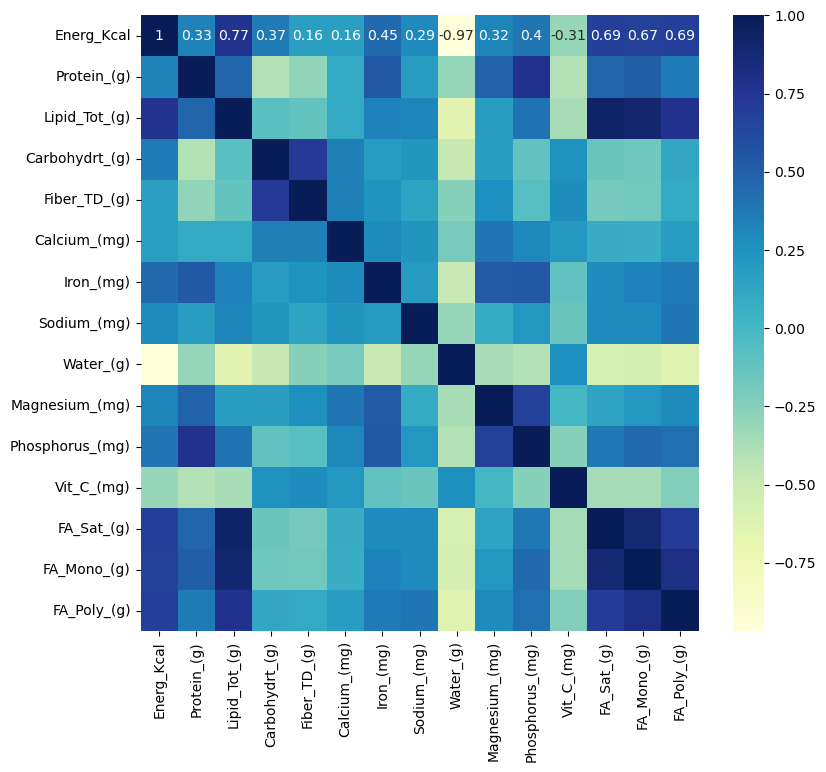

In [29]:
# Obtenir le tableau de corélation et la heatmap (corrélation de spearman)

corr_matrix = df_quantitatives.corr(method='spearman')

# Calcul des p-values pour chaque paire de variables
fig, ax = plt.subplots(figsize=(9,8))
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")
plt.show()

In [ ]:
# Obtenir le tableau de corélation et la heatmap (corrélation de kendall)

corr_matrix = df_quantitatives.corr(method='kendall')

# Calcul des p-values pour chaque paire de variables
fig, ax = plt.subplots(figsize=(9,8))
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")
plt.show()

## ANALYSE MULTIVARIÉE AVEC L'ACP

### CONSTUCTION DE L'ACP

In [30]:
# IMPORTATION DES PACKEGES

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [35]:
df=df_miss

In [36]:
# SÉPARATION DES DONNÉES EN VARIABLE EXPLIQUATIVE ET VARIABLE EXPLIQUÉE

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [37]:
# NORMALISATION DES DONNÉES

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
# RÉDUCTION DES DIMENSIONS

pca = PCA()
X_pca=pca.fit_transform(X_scaled)

### CHOIX DU NOMBRE D'AXE

In [54]:
# Analyse des valeurs propres
comp = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(15)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
comp

Dimension  Valeur propre  % variance expliquée  % cum. var. expliquée
0       Dim1       4.405104                  29.0                   29.0
1       Dim2       2.803363                  19.0                   48.0
2       Dim3       1.707862                  11.0                   59.0
3       Dim4       1.107273                   7.0                   67.0
4       Dim5       1.014667                   7.0                   74.0
5       Dim6       0.846930                   6.0                   79.0
6       Dim7       0.795014                   5.0                   85.0
7       Dim8       0.688128                   5.0                   89.0
8       Dim9       0.628821                   4.0                   93.0
9      Dim10       0.372836                   2.0                   96.0
10     Dim11       0.333494                   2.0                   98.0
11     Dim12       0.258182                   2.0                  100.0
12     Dim13       0.034260                   0.0                  100.0
13     Dim14       0.003703                   0.0                  100.0
14     Dim15       0.002070                   0.0                  100.0

Text(0.5, 0.98, 'Variance expliquée par dimension')

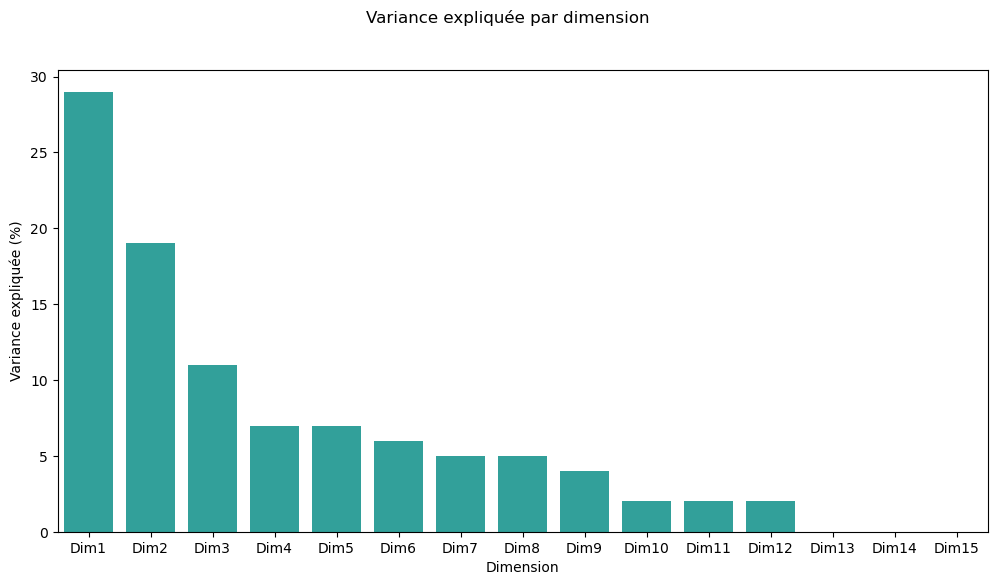

In [87]:
# SCREE PLOT POUR LE NOMBRE DE COMPOSANTS PRINCIPALES
plt.figure(figsize=(12, 6))


g_comp = sns.barplot(x = "Dimension", 
                y = "% variance expliquée",
                palette = ["lightseagreen"],
                data = comp)

g_comp.set(ylabel = "Variance expliquée (%)")
g_comp.figure.suptitle("Variance expliquée par dimension")

In [56]:
X.shape

(8790, 15)

In [59]:
# CALCUL DES COSINUS CARRÉ
cos_squared = np.square(pca.components_)

# CRÉATION D'UN DATAFRAME PANDAS AVEC LE COSINUS CARRÉ DES VARIABLES

df_cos_squared = pd.DataFrame(cos_squared, columns=['PC{}'.format(i+1) for i in range(X.shape[1])])
df_cos_squared.index = df_miss.columns[:-1]

print(df_cos_squared)

                      PC1       PC2       PC3       PC4       PC5       PC6  \
Shrt_Desc        0.206126  0.004336  0.147326  0.042977  0.026473  0.019409   
Energ_Kcal       0.006358  0.001295  0.109536  0.105154  0.129334  0.094299   
Protein_(g)      0.010790  0.345235  0.002410  0.217305  0.033364  0.066420   
Lipid_Tot_(g)    0.000298  0.033107  0.000802  0.012776  0.060937  0.098192   
Carbohydrt_(g)   0.006766  0.055486  0.008253  0.018757  0.000912  0.071693   
Fiber_TD_(g)     0.036521  0.090782  0.005825  0.060446  0.115581  0.004492   
Calcium_(mg)     0.003800  0.192562  0.005529  0.000394  0.000964  0.333863   
Iron_(mg)        0.007429  0.000595  0.010364  0.072228  0.026313  0.001582   
Sodium_(mg)      0.002239  0.003078  0.001477  0.005394  0.212795  0.005292   
Water_(g)        0.000584  0.083650  0.000078  0.004900  0.380944  0.021431   
Magnesium_(mg)   0.000585  0.002450  0.000141  0.004531  0.000766  0.008679   
Phosphorus_(mg)  0.005120  0.115147  0.000932  0.000

In [64]:
# CALCULER LA CONTRIBUTION DES VARIABLES À LA FORMATION DES AXES
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues

# CONVERTIR LES CONTRIBUTIONS EN POURCENTAGE
variable_contrib_percent = variable_contributions / eigenvalues * 100

# CRÉER UN DATAFRAME POUR FACILITER L'AFFICHAGE DES RÉSULTATS
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contrib_percent, columns=column_names, index=feature_names)

print(variable_contrib_df)

                 PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib  \
Energ_Kcal         20.612576     0.635759     1.079037     0.029820   
Protein_(g)         0.433645     0.129461    34.523508     3.310723   
Lipid_Tot_(g)      14.732564    10.953589     0.241045     0.080164   
Carbohydrt_(g)      4.297661    10.515362    21.730463     1.277575   
Fiber_TD_(g)        2.647285    12.933380     3.336370     6.093707   
Calcium_(mg)        1.940889     9.429859     6.641997     9.819177   
Iron_(mg)           2.225412    12.403027     0.044533     1.737821   
Sodium_(mg)         0.256430     0.497686     0.208401    63.300077   
Water_(g)          17.102424     2.295204     3.095067     0.855098   
Magnesium_(mg)      4.489299    11.466960     2.293526     9.462958   
Phosphorus_(mg)     2.877339     6.526246    25.206995     1.385096   
Vit_C_(mg)          0.000489     1.080584     0.457135     1.436201   
FA_Sat_(g)          7.992036     7.930300     0.222378     0.336477   
FA_Mon

In [65]:
# CALCULER LA CONTRIBUTION DES INDIVIDUS À LA FORMATION DES AXES
eigenvalues = pca.explained_variance_
contributions = (X_pca**2) / (X_pca.shape[0] * eigenvalues)

# CONVERTIR LES CONTRIBUTIONS EN POURCENTAGE
contrib_percent = contributions * 100

# CRÉER UN DATAFRAME POUR FACILITER L'AFFICHAGE DES RÉSULTATS
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
contrib_df = pd.DataFrame(contrib_percent, columns=column_names)

print(contrib_df)

      PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib  PC5_contrib  \
0        0.090542     0.121664     0.000645     0.007634     0.008316   
1        0.079689     0.105436     0.001357     0.006400     0.006702   
2        0.157242     0.188321     0.001150     0.001150     0.011186   
3        0.010511     0.002060     0.033759     0.028549     0.004046   
4        0.013599     0.000967     0.047268     0.019995     0.006338   
...           ...          ...          ...          ...          ...   
8785     0.005950     0.002112     0.012490     0.111850     0.000115   
8786     0.003582     0.000577     0.016787     0.000795     0.000900   
8787     0.000132     0.002283     0.032125     0.001561     0.003472   
8788     0.001102     0.009066     0.018003     0.023973     0.000053   
8789     0.006734     0.000010     0.008866     0.000279     0.000116   

      PC6_contrib  PC7_contrib  PC8_contrib  PC9_contrib  PC10_contrib  \
0        0.071918     0.060913     0.105065     0

## REPRÉSENTATION GRAPHIQUE

In [85]:
# FONCTION QUI PERMET DE TRACER LE GRAPHES DE CORRÉLATIONS SELON LES PLANS CHOISIS
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(12, 12))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i], fontsize=12, weight='bold',color='b')
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # Titre du graphe
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.savefig('CorrGraph_{}.jpg'.format(x_y), bbox_inches='tight')
    plt.show(block=False)

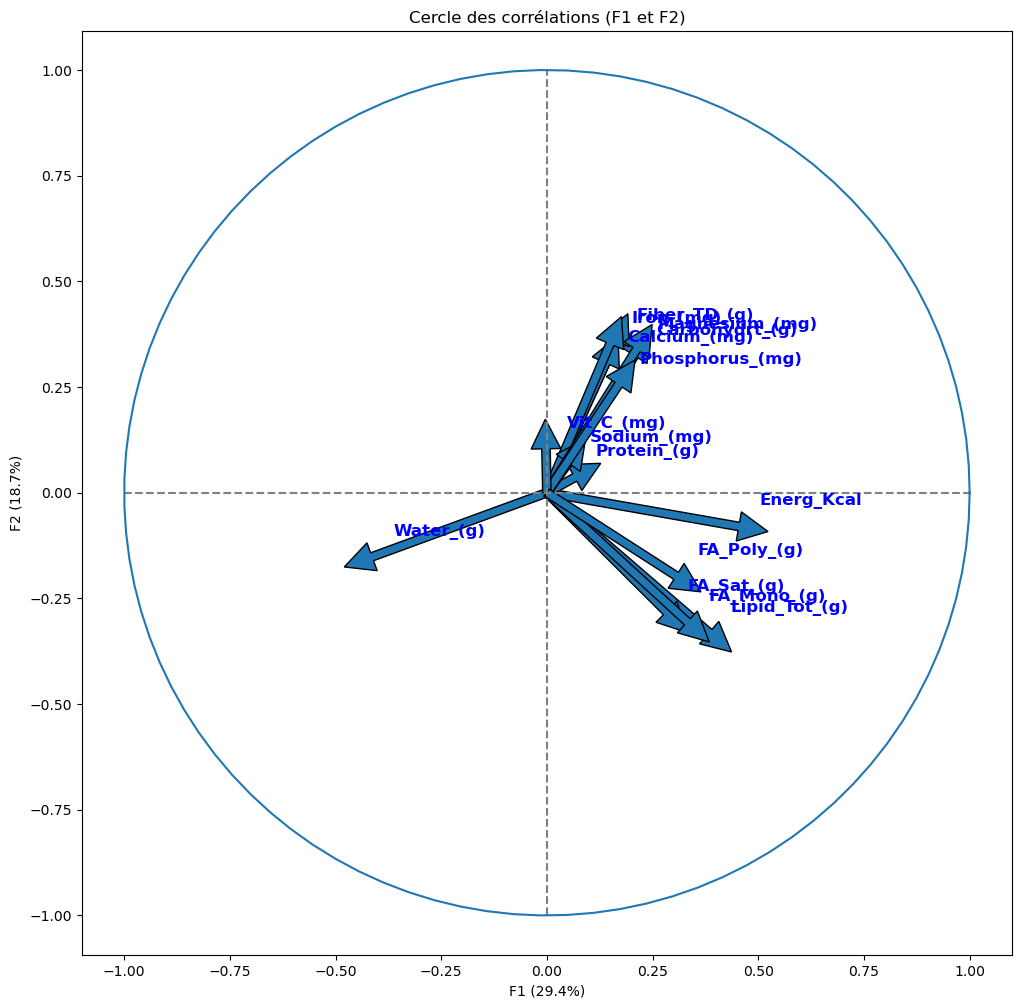

In [86]:
#pour F1 et F2
x_y = (0,1)
x_y

correlation_graph(pca, x_y, keep_vars[1:])

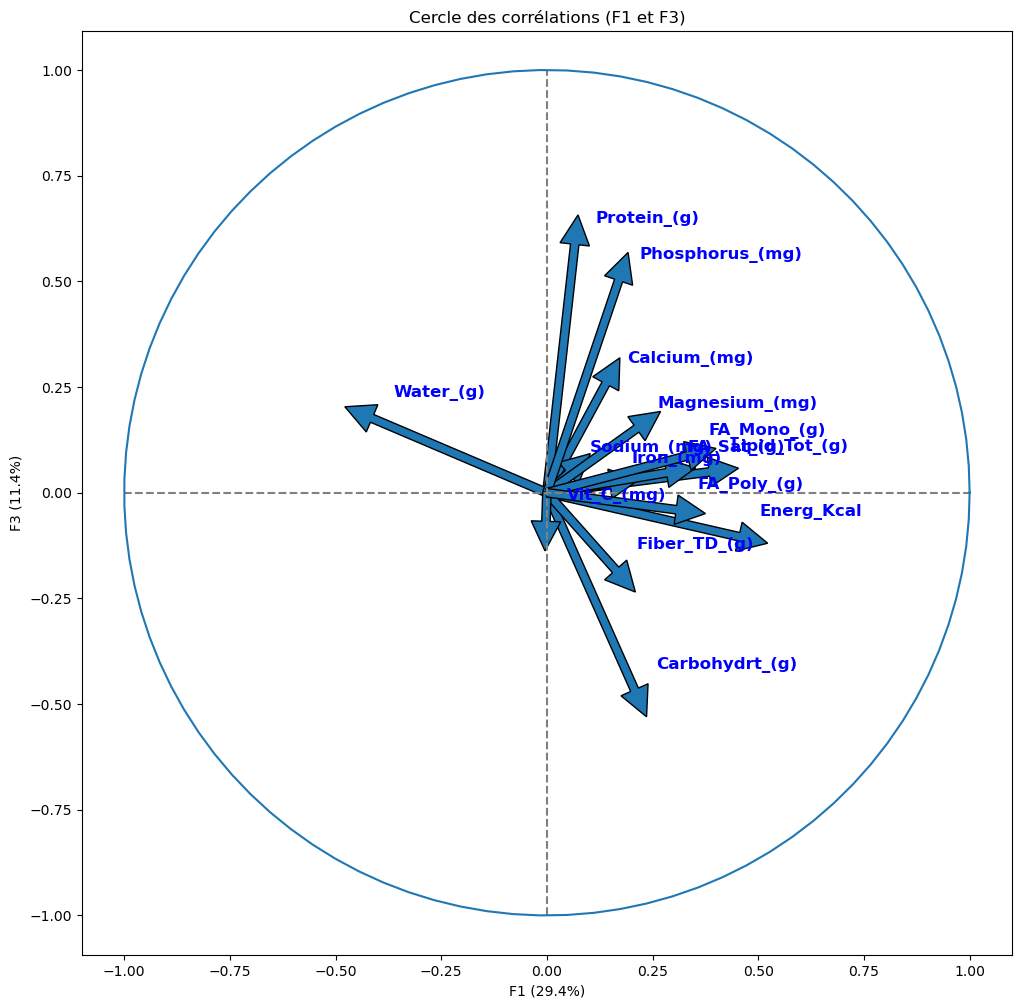

In [72]:
#pour F1 et F3
x_y = (0,1)
x_y

correlation_graph(pca, x_y, keep_vars[1:])

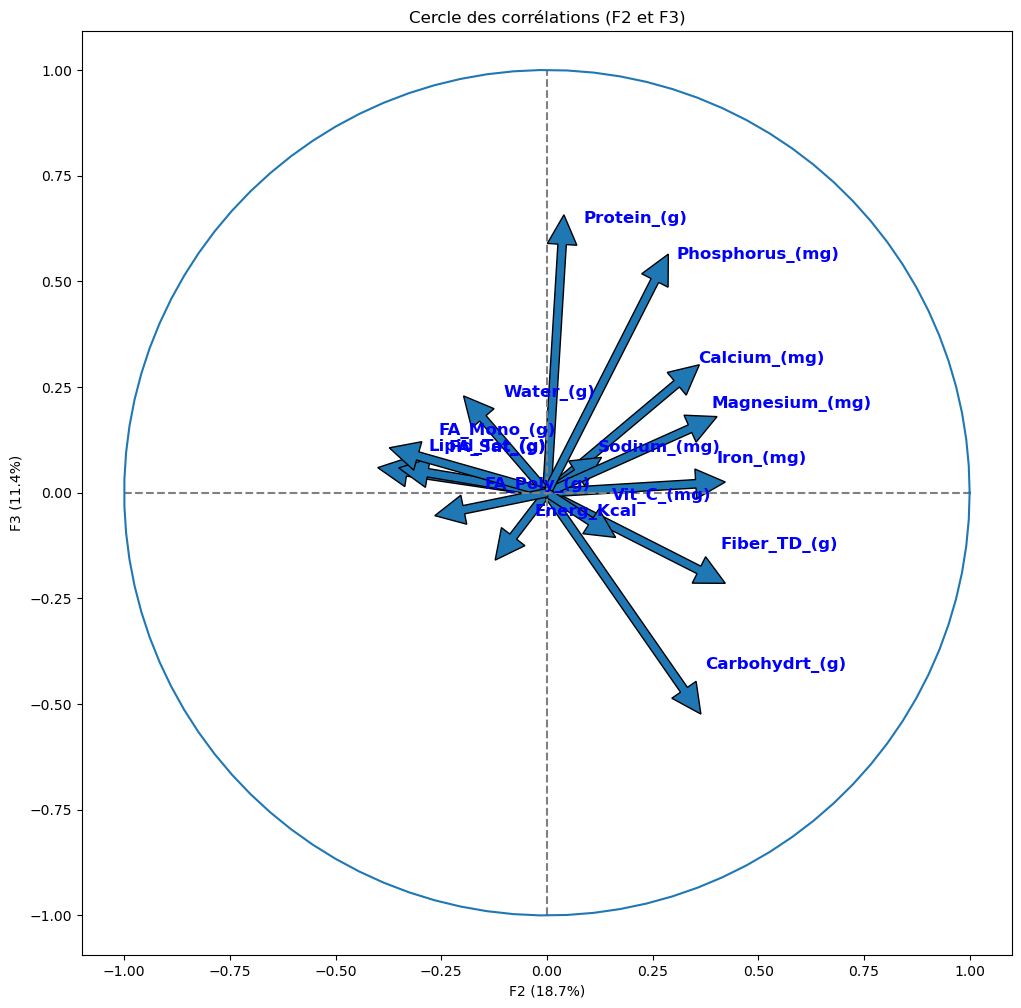

In [73]:
#pour F2 et F3
x_y = (1,2)
x_y

correlation_graph(pca, x_y, keep_vars[1:])